# Assignment06
## Name : Yeon-Jee Jung
## Student ID : 20142052
## Git URL : https://github.com/YeonjeeJung/assignment06

# Import packages for plotting graphs and manipulating data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set variables and visualize data:

## Set variables
Make data y1 as noisy data, and make clean data y2 as $y2 = 2\cdot x + 10$.

In [2]:
num = 201
std = 20
a = 2 
b = 10

n = np.random.rand(num)
nn = n - np.mean(n)
x = np.linspace(-100,100,num)
y1 = a * x + nn * std + b 
y2 = a * x + b

# x  : x-coordinate data
# y1 : (noisy) y-coordinate data
# y2 : (clean) y-coordinate data 
# y = f(x) = a * x + b

## Show Noisy data

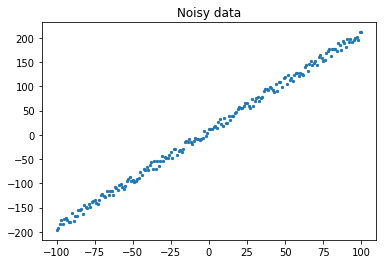

In [3]:
plt.scatter(x, y1, s=5)
plt.title("Noisy data")
plt.show()

## Show Clean data

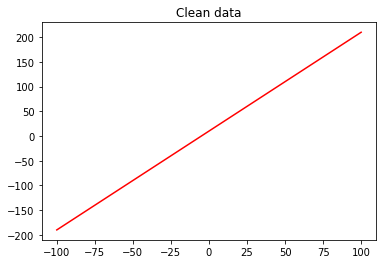

In [4]:
plt.plot(x, y2, 'r')
plt.title("Clean data")
plt.show()

# Define functions to solve Least-square problem :

## Define Matrix A

$$
A = \begin{bmatrix}
1 & x_1 \\
1 & x_2  \\
\vdots & \vdots \\
1 & x_n 
\end{bmatrix}$$

And then we will find $$ \begin{bmatrix} b \\ a \end{bmatrix}$$ that minimizes $$\begin{Vmatrix}\begin{bmatrix}1 & x_1 \\1 & x_2  \\\vdots & \vdots \\1 & x_n \end{bmatrix}\cdot\begin{bmatrix} b \\ a \end{bmatrix} - \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}\end{Vmatrix}$$.

In [5]:
A = np.array([[1, x1] for x1 in x])

## Define norm function
This function returns norm of a vector.

In [6]:
def norm(vector):
    sum = 0
    for i in range(len(vector)):
        sum += vector[i]**2
    return np.sqrt(sum)

## Define computeQR function
This function returns the Q, R matrix from input matrix. Q is the orthonormal matrix, and R is upper triangle matrix.

In [7]:
def computeQR(matrix):
    result_Q = np.zeros(matrix.shape)
    result_R = np.zeros([matrix.shape[1], matrix.shape[1]])
    for i in range(matrix.shape[1]):
        ai = matrix[:,0]
        if i == 0:
            result_Q[:,0] = matrix[:,0] / norm(ai)
        else:
            hq = matrix[:,i]
            for j in range(i):
                hq -= np.matmul(result_Q[:,j].T, matrix[:,i])*result_Q[:,j]
            result_Q[:,i] = hq / norm(hq)
            
    for i in range(matrix.shape[1]):
        for j in range(i, matrix.shape[1]):
            result_R[i][j] = np.matmul(result_Q[:,i].T, matrix[:,j])
            
    return result_Q, result_R

## Define findX function
This function returns x, from Q, R, and b. Q, R is from computeQR function, that makes A by multiplication. So this function can find x that satisfy least-square problem such that $A\cdot x = Q\cdot R\cdot x = b$.

In [8]:
def findX(Q, R, b):
    Rsol = np.matmul(Q.T, b)
    sol = np.zeros(Rsol.shape)
    for i in reversed(range(Rsol.shape[0])):
        a = Rsol[i]
        for j in reversed(range(i+1, Rsol.shape[0])):
            a -= sol[j]*R[i][j]
        sol[i] = a / R[i][i]
    return sol

# Calculate Q, R, and find the solution:

## Calculate Q, R, and the solution.

In [9]:
Q, R = computeQR(A)
sol = findX(Q, R, y1)
print(sol)

[10.          1.99874327]


## Show the graph of calculated coefficients

You can see the green line covers the red line. That means my coefficients are close to the original coefficients.

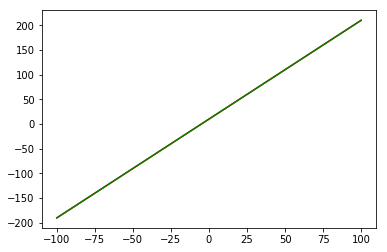

In [10]:
myY = sol[0] + sol[1]*x
plt.plot(x, y2, 'r')
plt.plot(x, myY, 'g')
plt.show()